In [1]:
# Import required libraries
import pandas as pd  # For data handling
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # Advanced visualization
import scipy.stats as stats  # For statistical calculations
# Mount Google Drive (if dataset is stored there)
from google.colab import files
# Upload the CSV file manually in Colab
uploaded = files.upload()
# Load the dataset
df = pd.read_csv("sales_data.csv")
# Display the first few rows of the dataset
df.head()

Saving sales_data.csv to sales_data.csv


,Order_ID,Customer_ID,Order_Date,Product_Category,Product_Price,Quantity,Payment_Method,Region
0,O0001,C039,01/01/2023,Electronics,43.45,3,Credit Card,North
1,O0002,C029,01/02/2023,Books,32.77,4,Paypal,South
2,O0003,C015,01/03/2023,Books,44.84,3,Credit Card,North
3,O0004,C043,01/04/2023,Books,NaN,1,Credit Card,North
4,O0005,C008,01/05/2023,Home Decor,23.01,1,Paypal,South


In [11]:
# Import datetime module
from datetime import date
# Get the current date and time
current_time = date.today()
# Display the date and time
print(f"Current Date and Time: {current_time}")
# Ensure column names are stripped of spaces
df.columns = df.columns.str.strip()
# Create the 'Sales' column using: Sales = Product_Price * Quantity
if 'Product_Price' in df.columns and 'Quantity' in df.columns:
    df['Sales'] = df['Product_Price'] * df['Quantity']
    print("'Sales' column created successfully.")
else:
    print("Error: 'Product_Price' or 'Quantity' column is missing.")
# Display first few rows to verify 'Sales' column
print(df[['Product_Price', 'Quantity', 'Sales']].head())


Current Date and Time: 2025-03-31
'Sales' column created successfully.
   Product_Price  Quantity   Sales
0          43.45         3  130.35
1          32.77         4  131.08
2          44.84         3  134.52
3            NaN         1     NaN
4          23.01         1   23.01


In [12]:
mean_sales = df['Sales'].mean()
median_sales = df['Sales'].median()
mode_sales = df['Sales'].mode()[0]  # Mode can have multiple values, take the first
print("Measures of Central Tendency:")
print(f"Mean Sales: {mean_sales}")
print(f"Median Sales: {median_sales}")
print(f"Mode Sales: {mode_sales}")

Measures of Central Tendency:
Mean Sales: 240.36694736842102
Median Sales: 203.75
Mode Sales: -60.72


In [14]:
variance_sales = df['Sales'].var()
std_dev_sales = df['Sales'].std()
print("Measures of Distribution:")
print(f"Variance of Sales: {variance_sales}")
print(f"Standard Deviation of Sales: {std_dev_sales}")

Measures of Distribution:
Variance of Sales: 28475.56145973124
Standard Deviation of Sales: 168.74703392869233


In [16]:
skewness_sales = df['Sales'].skew()
kurtosis_sales = df['Sales'].kurtosis()
print("Skewness & Kurtosis Analysis:")
print(f"Skewness of Sales: {skewness_sales}")
print(f"Kurtosis of Sales: {kurtosis_sales}")

Skewness & Kurtosis Analysis:
Skewness of Sales: 0.6797635101311076
Kurtosis of Sales: 0.22130403355887607


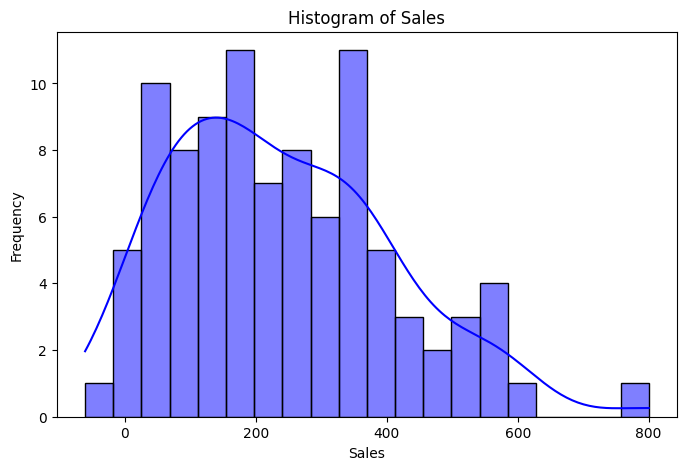

In [22]:
# 2a) Create a histogram to analyze Sales distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=20, kde=True, color='blue')
plt.title("Histogram of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

In [19]:
# 2b) Generate a stem-and-leaf plot (Simulated using a text-based approach)
def stem_and_leaf_plot(series):
    # Drop missing values (NaN) before processing
    series_sorted = sorted(series.dropna())
    stems = {}
    for value in series_sorted:
        stem, leaf = divmod(int(value), 10)
        stems.setdefault(stem, []).append(leaf)
    for stem, leaves in stems.items():
        print(f"{stem} | {' '.join(map(str, leaves))}")
print("Stem-and-leaf plot for Sales:")
stem_and_leaf_plot(df['Sales'])

Stem-and-leaf plot for Sales:
-6 | 0
0 | 0 1 8
1 | 2
2 | 3 8
3 | 3 6 7
5 | 2 8 8
6 | 0 4 6 9
7 | 4 5
8 | 4 6
9 | 0 9
10 | 1
11 | 5 7 7
13 | 0 1 4 6
14 | 6 8
15 | 7 8 9
16 | 0 1 6
17 | 0 3
18 | 6
19 | 0 4
20 | 0 1 1 3
22 | 3 5
23 | 4
24 | 7 8 8
25 | 4 6
26 | 8 8
27 | 3
29 | 2
30 | 1 1
31 | 2 5 7
33 | 0 7
34 | 5 5 6 6 6 7 9
36 | 1 5
37 | 0 6
38 | 7
39 | 9
41 | 1 7
42 | 7
44 | 1
45 | 6
46 | 4
50 | 3
52 | 4
53 | 2
54 | 7
57 | 1 6
58 | 1
60 | 6
80 | 0


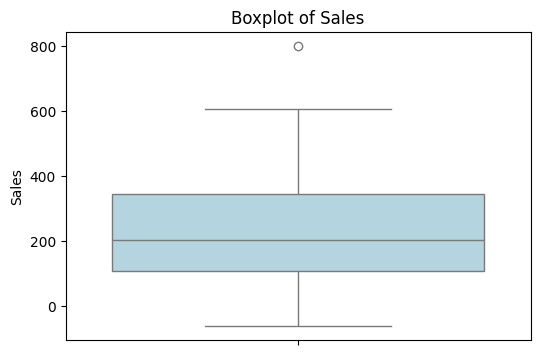

In [20]:
# 2c) Boxplot to identify outliers
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Sales'], color='lightblue')
plt.title("Boxplot of Sales")
plt.ylabel("Sales")
plt.show()

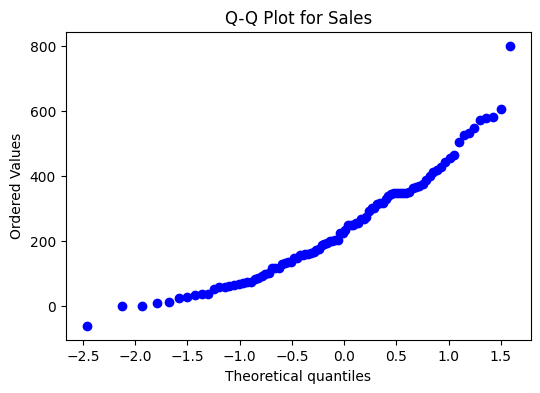

In [21]:
# 2d) Generate a Quantile-Normal plot (Q-Q plot)
plt.figure(figsize=(6, 4))
stats.probplot(df['Sales'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Sales")
plt.show()

In [24]:
# 3a) Cross-tabulation of Sales transactions by Region and Product Category
cross_tab = pd.crosstab(df['Region'], df['Product_Category'])
print("Cross-tabulation of Sales by Region and Product Category:\n", cross_tab)
# 3b) Calculate covariance and correlation between Sales and Quantity
covariance = df[['Sales', 'Quantity']].cov()
correlation = df[['Sales', 'Quantity']].corr()

print("Covariance between Sales and Quantity:\n", covariance)
print("Correlation between Sales and Quantity:\n", correlation)
# 3c) Visualization

# Barplot of total Sales per Region
plt.figure(figsize=(8, 5))
sns.barplot(x=df.groupby("Region")["Sales"].sum().index, y=df.groupby("Region")["Sales"].sum().values)
plt.title("Total Sales per Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

# Scatterplot of Sales vs Quantity
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df['Quantity'], y=df['Sales'])
plt.title("Sales vs Quantity Scatterplot")
plt.xlabel("Quantity Sold")
plt.ylabel("Sales")
plt.show()

# Side-by-side boxplots of Sales for each Product Category
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Product_Category'], y=df['Sales'])
plt.title("Boxplot of Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Sales")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

Cross-tabulation of Sales by Region and Product Category:
 Product_Category  Books  Clothing  Electronics  Home Decor
Region                                                    
East                  7         5            6           6
North                 5         6            7          11
South                 5         3            5           8
West                  7         5            5           4


In [29]:
# 3b) Calculate covariance and correlation between Sales and Quantity
covariance = df[['Sales', 'Quantity']].cov()
correlation = df[['Sales', 'Quantity']].corr()

print("Covariance between Sales and Quantity:\n", covariance)
print("Correlation between Sales and Quantity:\n", correlation)


Covariance between Sales and Quantity:
                 Sales    Quantity
Sales     28475.56146  334.905660
Quantity    334.90566    6.539293
Correlation between Sales and Quantity:
              Sales  Quantity
Sales     1.000000  0.774528
Quantity  0.774528  1.000000


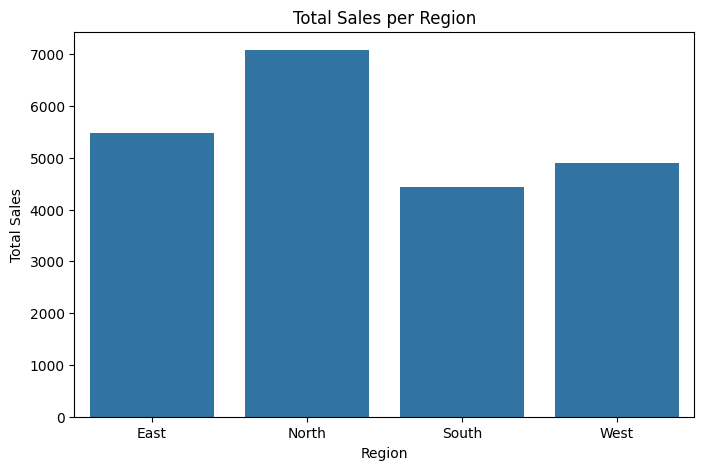

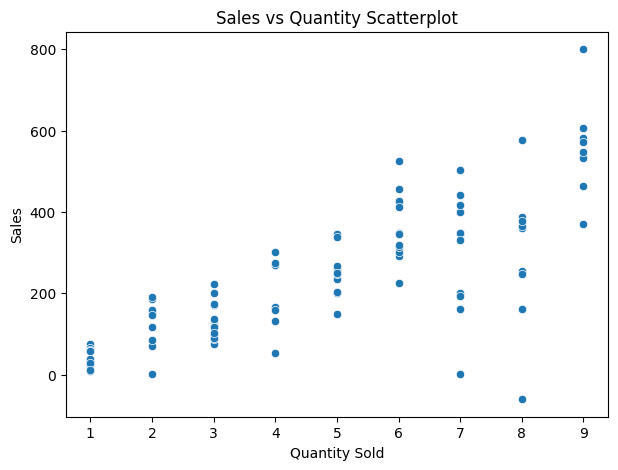

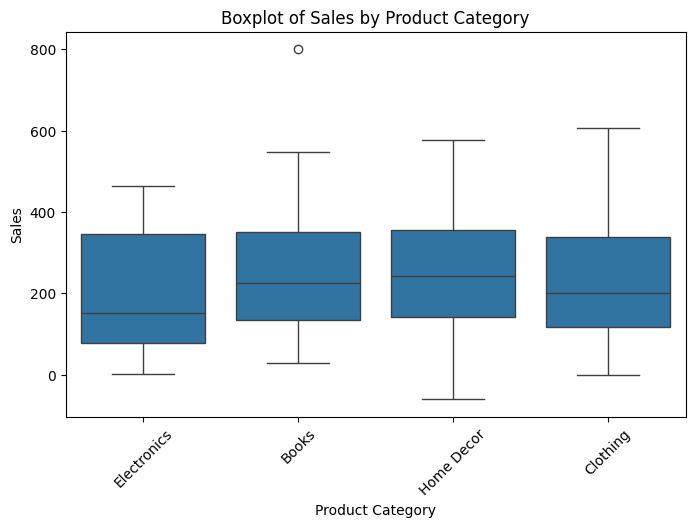

In [28]:
# 3c) Visualization

# Barplot of total Sales per Region
plt.figure(figsize=(8, 5))
sns.barplot(x=df.groupby("Region")["Sales"].sum().index, y=df.groupby("Region")["Sales"].sum().values)
plt.title("Total Sales per Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

# Scatterplot of Sales vs Quantity
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df['Quantity'], y=df['Sales'])
plt.title("Sales vs Quantity Scatterplot")
plt.xlabel("Quantity Sold")
plt.ylabel("Sales")
plt.show()

# Side-by-side boxplots of Sales for each Product Category
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Product_Category'], y=df['Sales'])
plt.title("Boxplot of Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Sales")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()